In [60]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm
from IPython.display import display



In [61]:
def DrawCircle(img,img_array,rad=3):
    copy_img=img.copy()
    draw = ImageDraw.Draw(copy_img)
    for idx, is_outlier in enumerate(img_array.flatten()):
        if is_outlier==0:
            x = idx % img.width
            y = idx // img.width
            radius = rad  # radius of the circle
            draw.ellipse((x-radius, y-radius, x+radius, y+radius), outline="red", width=1)
    display(copy_img)
    return copy_img

In [62]:
# The user has uploaded a grayscale image. Let's first load this image.
image_name="0080.jpg"
gray_image_path = 'grayimages/'+image_name
gray_image = Image.open(gray_image_path)

# Convert the image to a numpy array
gray_image_array = np.array(gray_image)


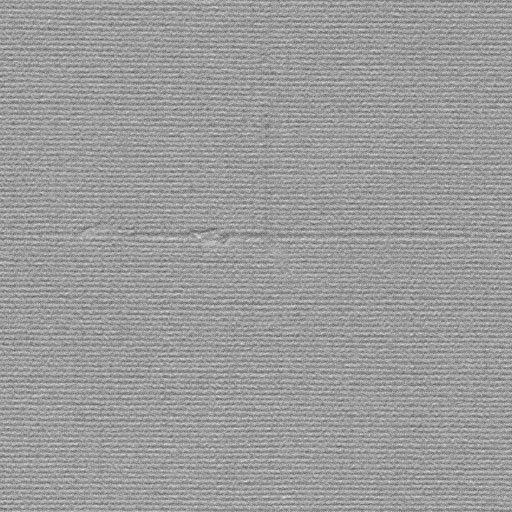

In [63]:
# Display the grayscale image
display(gray_image)

----------------------------

# **1)**

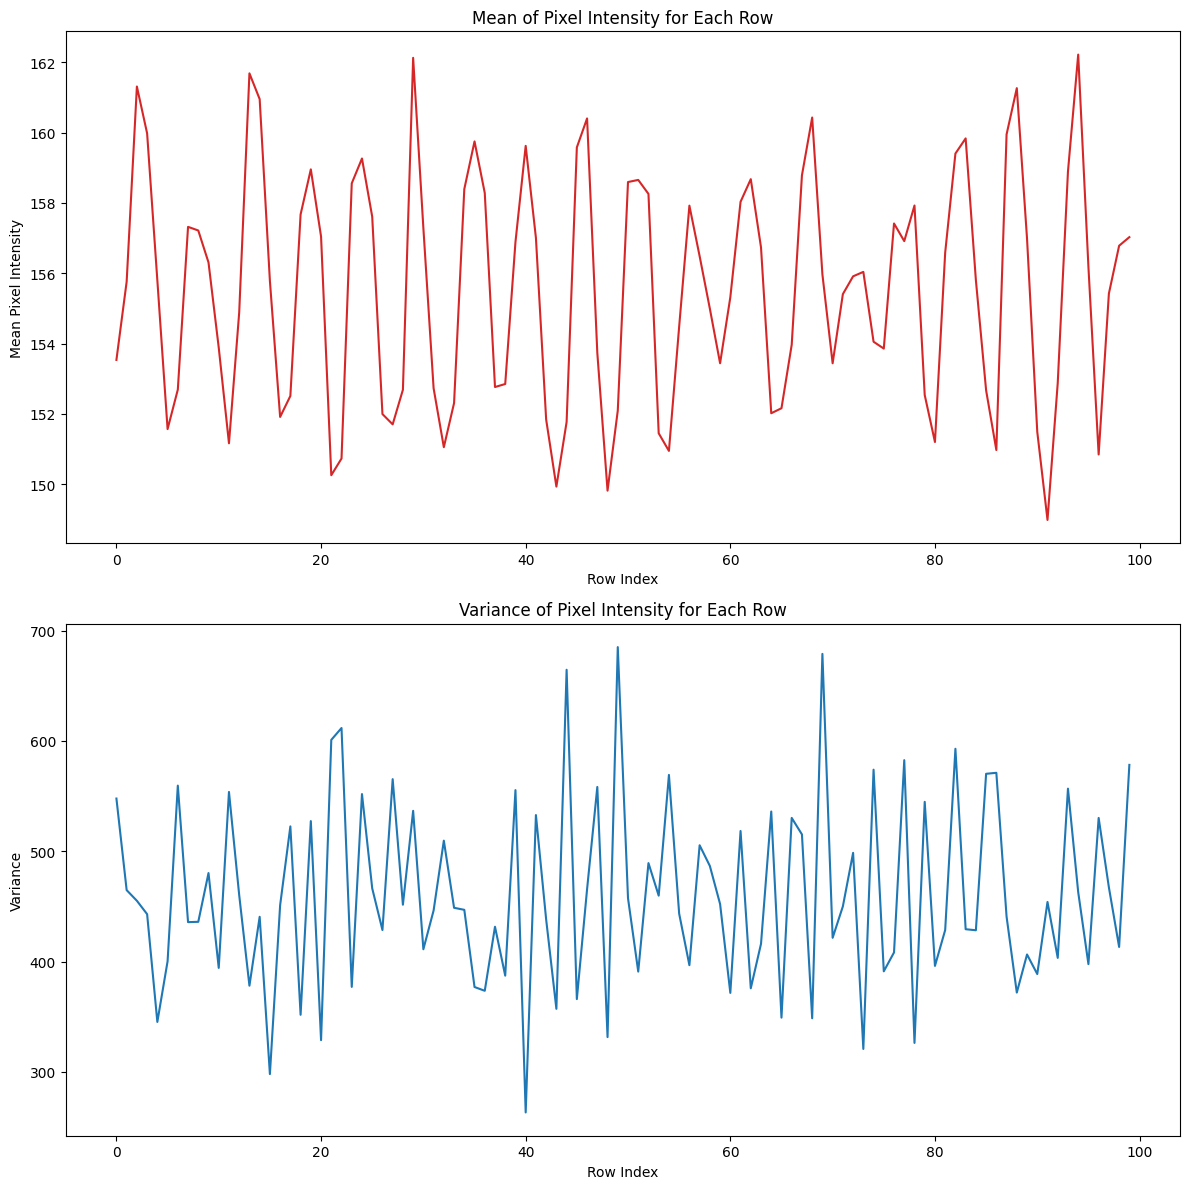

In [64]:
# Calculate the mean and variance for each row of the image
rows_mean = np.mean(gray_image, axis=1)
rows_variance = np.var(gray_image, axis=1)

# Plot the mean and variance for each row in separate plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot for mean
ax1.set_xlabel('Row Index')
ax1.set_ylabel('Mean Pixel Intensity')
ax1.plot(rows_mean[:100], color='tab:red')
ax1.set_title('Mean of Pixel Intensity for Each Row')

# Plot for variance
ax2.set_xlabel('Row Index')
ax2.set_ylabel('Variance')
ax2.plot(rows_variance[:100], color='tab:blue')
ax2.set_title('Variance of Pixel Intensity for Each Row')

fig.tight_layout()
plt.show()


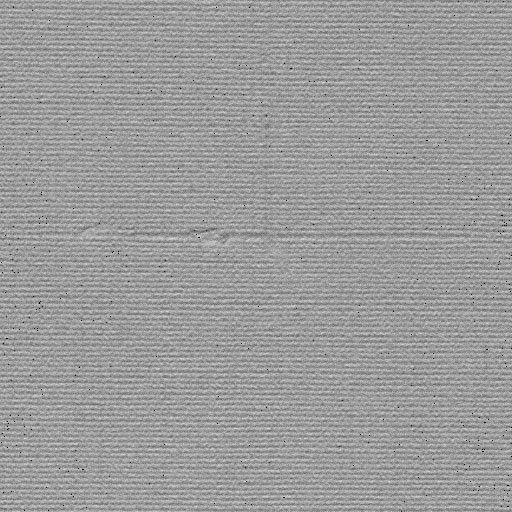

In [65]:
# Identify rows with out-of-control pixel values using 3-sigma rule
control_limit = 3 * np.sqrt(rows_variance)
upper_control_limit = rows_mean + control_limit
lower_control_limit = rows_mean - control_limit

gray_image_array=np.array(gray_image)
modified_image_rows_matrix=[]
for i, row in enumerate(gray_image_array):
    out_of_control_rows = np.logical_or(row > upper_control_limit[i], row < lower_control_limit[i])
    modified_image_rows_matrix.append(out_of_control_rows)

modified_pixels_rows = np.array(gray_image).flatten()

modified_image_rows_array=np.array(modified_image_rows_matrix)

modified_image_rows_array_flatten=modified_image_rows_array.flatten()
modified_pixels_rows[modified_image_rows_array_flatten] = 0

modified_image_rows = modified_pixels_rows.reshape(gray_image.size[::-1])
modified_image_rows = Image.fromarray(modified_image_rows)

display(modified_image_rows)


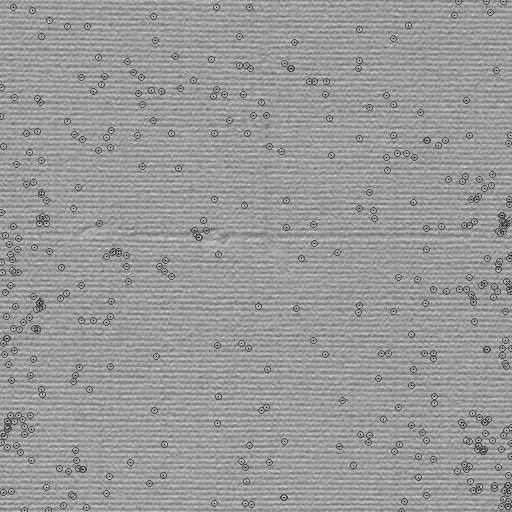

In [66]:
last_modified_image_rows = DrawCircle(modified_image_rows,modified_pixels_rows)

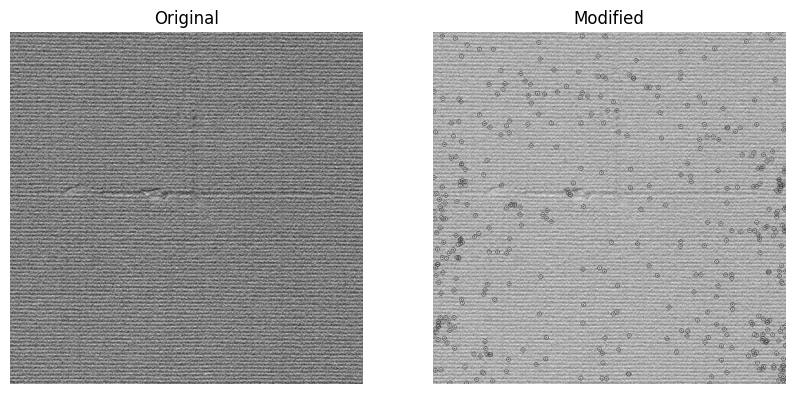

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')  

ax2.imshow(last_modified_image_rows, cmap='gray')
ax2.set_title('Modified')
ax2.axis('off')  

plt.show()

# **2)**

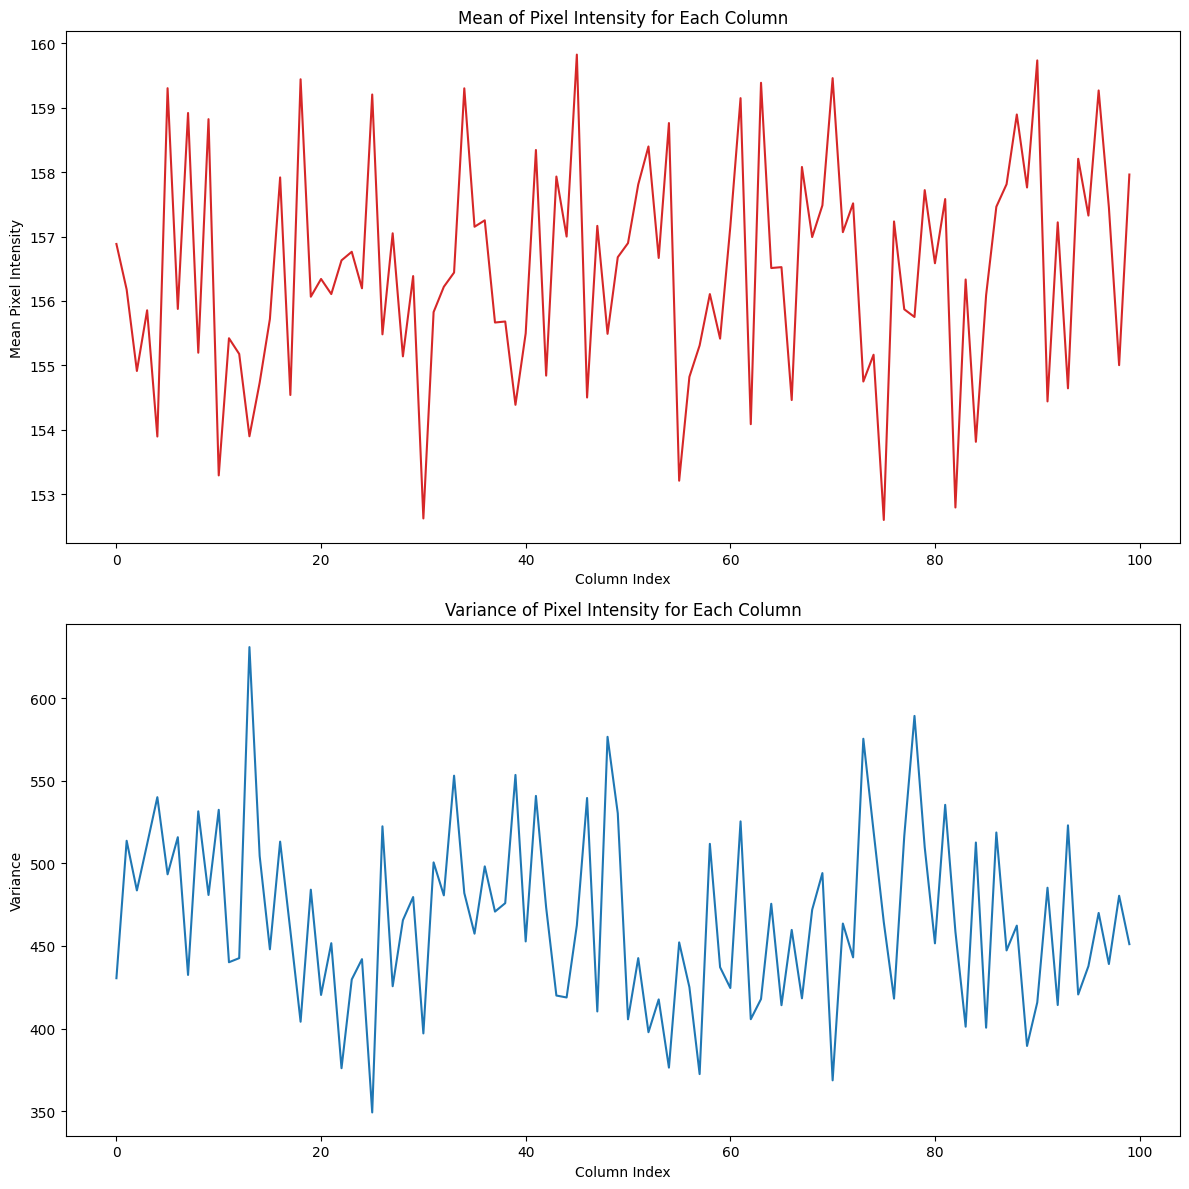

In [68]:
# Calculate the mean and variance for each column of the image
columns_mean = np.mean(gray_image, axis=0)
columns_variance = np.var(gray_image, axis=0)

# Plot the mean and variance for each column in separate plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot for mean
ax1.set_xlabel('Column Index')
ax1.set_ylabel('Mean Pixel Intensity')
ax1.plot(columns_mean[:100], color='tab:red')
ax1.set_title('Mean of Pixel Intensity for Each Column')

# Plot for variance
ax2.set_xlabel('Column Index')
ax2.set_ylabel('Variance')
ax2.plot(columns_variance[:100], color='tab:blue')
ax2.set_title('Variance of Pixel Intensity for Each Column')

fig.tight_layout()
plt.show()


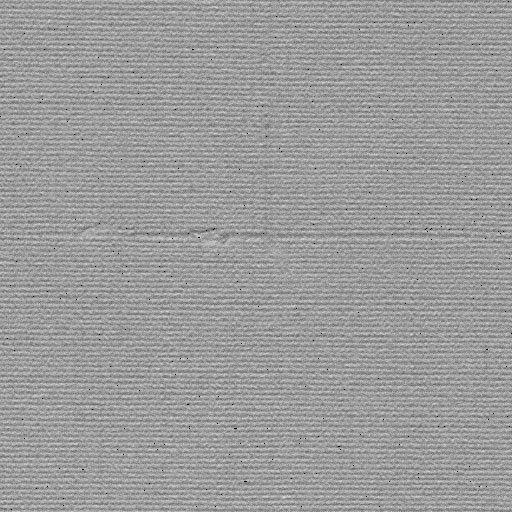

In [69]:
# Calculate the mean and variance for each column of the image
columns_mean = np.mean(gray_image_array, axis=0)
columns_variance = np.var(gray_image_array, axis=0)

# Identify columns with out-of-control pixel values using 3-sigma rule
control_limit_columns = 3 * np.sqrt(columns_variance)
upper_control_limit_columns = columns_mean + control_limit_columns
lower_control_limit_columns = columns_mean - control_limit_columns

modified_image_columns_matrix = []
for j, column in enumerate(gray_image_array.T):  # Transpose to iterate over columns
    out_of_control_columns = np.logical_or(column > upper_control_limit_columns[j], column < lower_control_limit_columns[j])
    modified_image_columns_matrix.append(out_of_control_columns)

modified_image_columns_array = np.array(modified_image_columns_matrix).T  # Transpose back to original orientation
modified_pixels_columns = np.array(gray_image).flatten()

modified_image_columns_matrix_flat = modified_image_columns_array.flatten()
modified_pixels_columns[modified_image_columns_matrix_flat] = 0

modified_image_columns = modified_pixels_columns.reshape(gray_image.size[::-1])
modified_image_columns = Image.fromarray(modified_image_columns)

# Display the modified image
display(modified_image_columns)

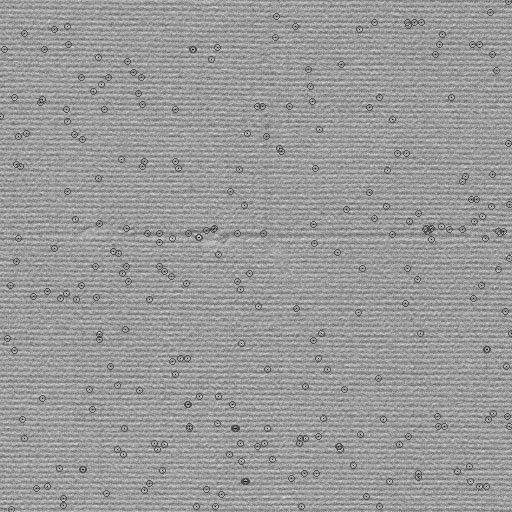

In [70]:
last_modified_image_columns = DrawCircle(modified_image_columns,modified_pixels_columns)

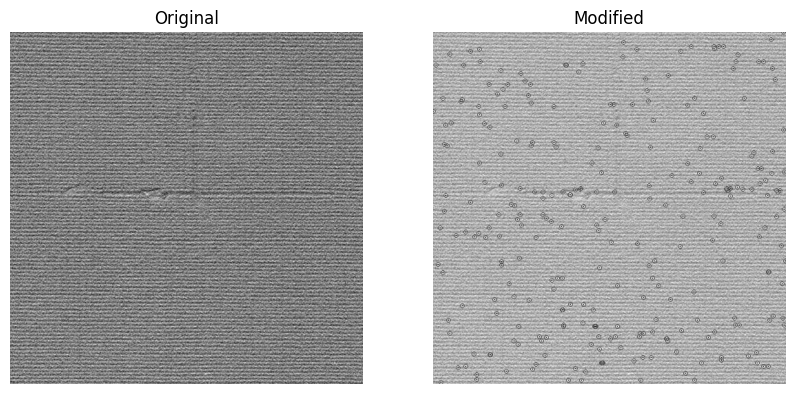

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')  

ax2.imshow(last_modified_image_columns, cmap='gray')
ax2.set_title('Modified')
ax2.axis('off')  

plt.show()